## Introduction ot Regression with Neural Networks in TensorFlow

There are many defination for a regression problme but in ur case,

**we're going to simplify it:**

  predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

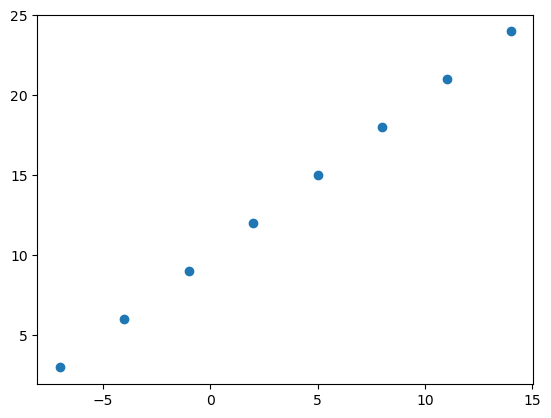

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# create feature

X=np.array([-7,-4,-1,2,5,8,11,14])

# create label
y=np.array([3,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


# Input and Output

In [2]:

housing_info=tf.constant(["breedroom","bathroom","garage"])

housing_price=tf.constant([93400])



In [3]:
# Turn x and y to Tensor

X=tf.constant(X,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modelling with Tenserflow 🏛️

1. createa a model - define the input and output layers, as well as the hidden layers of a deep learning model.

2. compile a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. fitting a model - letting the model try to find patterns between X & y (features and labels).

4. evaluate a model - how well the model is doing.

In [4]:
# set random seed

tf.random.set_seed(42)

# 1. create a model using sequential API

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1) # one hidden Layer
])

# 2. compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(),
              loss=tf.keras.losses.mae, # mean absolute error,
              metrics=["mae"]
              )

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated to expand dims

Epoch 1/5


2023-07-08 17:59:25.964107: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 280ms/step - loss: 16.4067 - mae: 16.4067
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 16.1254 - mae: 16.1254
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 15.8442 - mae: 15.8442
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 15.5629 - mae: 15.5629
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 15.2817 - mae: 15.2817


In [5]:
# check out X and y

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
# Try to make prediction

model.predict([20])


1/1 [==============================] - 0s 53ms/step


array([[-8.642612]], dtype=float32)

## Improving the Model

we can improve  our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [7]:
# lets rebuild the model

# 1. create the model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (longer Time)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated to expand dims


Epoch 1/100
1/1 [==============================] - 0s 125ms/step - loss: 19.4958 - mae: 19.4958
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 19.2145 - mae: 19.2145
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 18.9333 - mae: 18.9333
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 18.6520 - mae: 18.6520
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 18.3708 - mae: 18.3708
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 18.0895 - mae: 18.0895
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 17.8083 - mae: 17.8083
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 17.5270 - mae: 17.5270
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 17.2458 - mae: 17.2458
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 16.9645 - mae: 16.9645
Epoch 11/100
1/1 [==============================] - 0s 7m

In [8]:
model.predict([17])

1/1 [==============================] - 0s 33ms/step


array([[29.331469]], dtype=float32)

In [9]:
# Recreate model 2 with extra 100 layers

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]

)

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)



Epoch 1/100


/Users/magesh/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 280ms/step - loss: 11.8118 - mae: 11.8118
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0602 - mae: 11.0602
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2961 - mae: 10.2961
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 9.5185 - mae: 9.5185
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7258 - mae: 8.7258
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9165 - mae: 7.9165
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0883 - mae: 7.0883
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9046 - mae: 6.9046
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2380 - mae: 7.2380
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4322 - mae: 7.4322
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5572 - ma

In [10]:
model.predict([17])

1/1 [==============================] - 0s 41ms/step


array([[28.245853]], dtype=float32)

# Evalting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

when it comes to evaluation there are 3 words you should memorize:

>  "Visualize, visualize, visualize"

it's a good idea to visualize:

* The data - what data are we working with? what does it look like?


* The model itself - what does our model look like?


* The training of a model - how does a model perform while it learns?

* The Predictions of the model- how do the predictions of a model line up against the ground truth (the original labels)?

Let's see some examples.

In [11]:
# make a bigger dataset
X=tf.range(-100,100,4)
# Make labels for the dataset
y=X+10 # this the formulat that our model should learnl



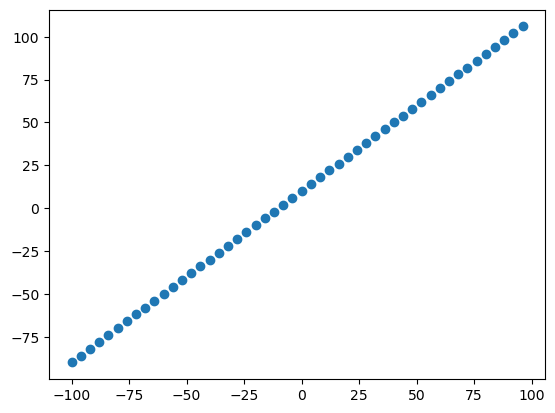

In [12]:
# visualize
import matplotlib.pyplot as plt

plt.scatter(X,y)

the 3 sets are:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available and is only used once a model is completely trained (the model has never "seen" the data in the test set).


In [40]:
# split the dataset
# 80% training and 20% for testing

train=int(len(X) *0.75) # 75%
valid=train+int(len(X)*0.15) # 15 %

print(train,valid, )
x_train,y_train=X[0:train],y[:train]
x_valid,y_valid=X[train:valid],y[train:valid]
x_test,y_test=y[valid:],y[valid:]

len(x_train),len(x_valid),len(x_test)

37 44


(37, 7, 6)

### Visualzing the data

Now we've got our data in training and test sets...let's visualize it again


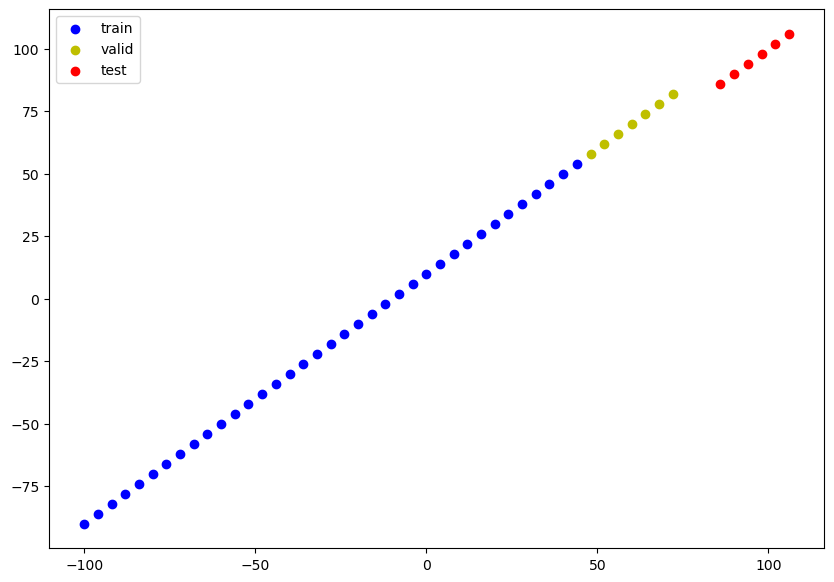

In [43]:
plt.figure(figsize=(10,7))

# plot train
plt.scatter(x_train,y_train,c="b",label="Traning data")

plt.scatter(x_valid,y_valid,c="y",label="valid data")

plt.scatter(x_test,y_test,c="r",label="valid data")

plt.legend(["train","valid","test"])

In [47]:
# let build


# 1. create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile

model.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# 3. Fit the model
# model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

In [48]:
# lets create the model which build automatically  by defining the input_shape

# 1. creat a model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. compile

model.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)



In [49]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.

* Trainable parameters - these are the parameters (patterns) the model can update as it trains.

* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).